In [3]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [4]:
workbook = xlrd.open_workbook('Input.xlsx')
worksheet = workbook.sheet_by_name('Data')

In [5]:
N = 82
R1 = zeros(N)
R2 = zeros(N)
R3 = zeros(N)
R4 = zeros(N)
B_rem = zeros(N)
Pi1 = zeros(N)
Pi2 = zeros(N)
B = zeros(N)

for i in range(N):
    R1[i] = worksheet.cell(0, i).value
    R2[i] = worksheet.cell(1, i).value
    R3[i] = worksheet.cell(2, i).value
    R4[i] = worksheet.cell(3, i).value
    B_rem[i] = worksheet.cell(4, i).value
    B[i] = worksheet.cell(5, i).value
    #B[i] = worksheet.cell(6, i).value

In [6]:
h = R3-R2
V_magnet = (R4**2 - R3**2 + R2**2-R1**2)
V_gap = (R3**2 - R2**2)
eta_vol = (B/B_rem)*((R3**2-R2**2)/(R4**2 - R3**2 + R2**2-20**2-R1**2))**0.5
V_in = R2**2 - R1**2
V_out = R4**2 - R3**2
V_t = R4**2 - R1**2

In [7]:
B[36:56]

array([1.75, 1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.35, 1.5 , 1.65, 1.8 , 1.15,
       1.3 , 1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 ])

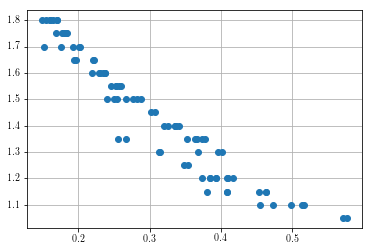

In [8]:
#plt.plot(V_magnet,eta,'o')
#plt.plot((V_gap[0:12]/(V_out[0:12]*0.6)),B[0:12],'o')
#plt.plot((V_gap[12:24]/(V_out[12:24]*0.6)),B[12:24],'o')
#plt.plot((V_gap[24:36]/(V_out[24:36]*0.6)),B[24:36],'o')
#plt.plot((V_gap[36:56]/(V_out[36:56]*0.6)),B[36:56],'o')
#plt.plot((V_gap[48:59]/(V_out[48:59]*0.6)),B[48:59],'o')

plt.plot((V_gap/(V_out*0.6)),B,'o')

plt.grid()

In [9]:
def eta(X,a,b,c,d): 
    P1,P2,P3 = X
    #return (a*((np.log(P1**b))+(np.log(P2**c))+(np.log(P3**d))+(np.log(P4**e)))*(P5**f))
    return (a*(P1**b)*(P2**c)*(P3**d))

In [10]:
M1 = curve_fit(eta,(R2,R3,B),R4)
#M = curve_fit(eta,phi, Qc,bounds=([-100,-100], [100,100]))
M1[0]

array([ 1.27708795, -1.18177842,  2.14218804,  0.70136265])

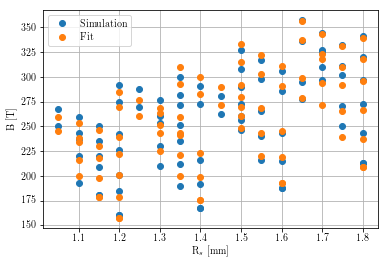

In [11]:
plt.plot(B,R4,'o',label = 'Simulation')
plt.plot(B,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.grid()
plt.legend()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('B [T]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [12]:
Erro = abs(R4 - eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]))/(R4)*100

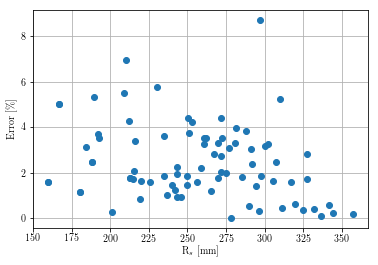

In [13]:
plt.plot(R4,Erro,'o')
plt.grid()
plt.xlabel('R$_s$ [mm]')
plt.ylabel('Error [$\%$]')
plt.savefig('MagnetError.png',format = 'png', dpi=1000,bbox_inches='tight')

In [14]:
k = 0
for i in range(len(Erro)):
    if Erro[i] > 6:
        k = k+1

In [15]:
100-k/len(Erro)*100

97.5609756097561

In [14]:
B_error = np.arange(150,350,0.1)
B

array([1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35,
       1.55, 1.75, 1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15,
       1.35, 1.55, 1.75, 1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 ,
       1.15, 1.35, 1.55, 1.75, 1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.35, 1.5 ,
       1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55,
       1.7 , 1.05, 1.2 , 1.35, 1.5 , 1.65, 1.2 , 1.35, 1.5 , 1.65, 1.8 ,
       1.15, 1.3 , 1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05,
       1.2 , 1.35, 1.5 , 1.65, 1.8 ])

In [15]:
B

array([1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.2 , 1.4 , 1.6 , 1.8 , 1.15, 1.35,
       1.55, 1.75, 1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 , 1.15,
       1.35, 1.55, 1.75, 1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.4 , 1.6 , 1.8 ,
       1.15, 1.35, 1.55, 1.75, 1.1 , 1.3 , 1.5 , 1.7 , 1.2 , 1.35, 1.5 ,
       1.65, 1.8 , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55,
       1.7 , 1.05, 1.2 , 1.35, 1.5 , 1.65, 1.2 , 1.35, 1.5 , 1.65, 1.8 ,
       1.15, 1.3 , 1.45, 1.6 , 1.75, 1.1 , 1.25, 1.4 , 1.55, 1.7 , 1.05,
       1.2 , 1.35, 1.5 , 1.65, 1.8 ])

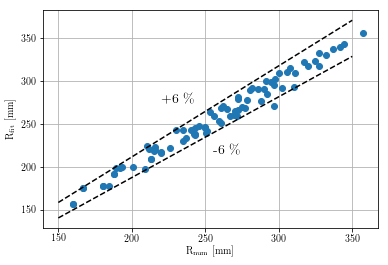

In [16]:
plt.plot(R4,eta((R2,R3,B),M1[0][0],M1[0][1],M1[0][2],M1[0][3]),'o',label  = 'Fit')
plt.plot(B_error,0.94*B_error,'k--')
plt.plot(B_error,1.06*B_error,'k--')
plt.grid()
plt.text(255, 215, '-6 $\%$', fontsize=14)
plt.text(220, 275, '+6 $\%$', fontsize=14)
#plt.legend()
plt.xlabel('R$_\mathrm{num}$ [mm]')
plt.ylabel('R$_\mathrm{fit}$ [mm]')
plt.savefig('MagnetFit.png',format = 'png', dpi=1000,bbox_inches='tight')

In [17]:
R_m = np.arange(130,210,1)

[]

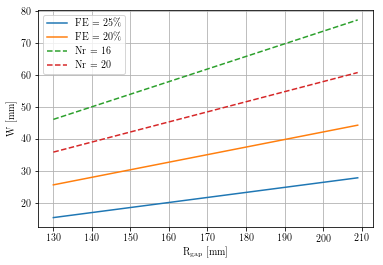

In [29]:
plt.plot(R_m,np.pi*R_m/(2)*(0.35-0.25)-5, label = 'FE = 25\%')
plt.plot(R_m,np.pi*R_m/(2)*(0.35-0.2)-5, label = 'FE = 20\%')

plt.plot(R_m,2*np.pi*R_m/(16)-5,'--', label = 'Nr = 16')
plt.plot(R_m,2*np.pi*R_m/(20)-5,'--', label = 'Nr = 20')

#plt.plot(R_m,2*np.pi*R_m/32,':', label = 'N = 20')
#lt.plot(R_m,np.pi*R_m*0.25/4, label = '4 poles - FM = 25\%')
#plt.plot(R_m,np.pi*R_m*0.35/4, label = '4 poles - FM = 35\%')
plt.xlabel('R$_\mathrm{gap}$ [mm]')
plt.ylabel('W [mm]')
plt.legend()
plt.grid()

plt.savefig('Rgap_W.png',format = 'png', dpi=1000,bbox_inches='tight')

plt.plot()